In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import point
from geopandas import GeoDataFrame

In [4]:
#Reading data into notebook
Gdp = pd.read_csv("D:\\Second term documents\\geospatial\\API_NY.GDP.MKTP.KD_DS2_en_csv_v2_1622113.csv", skiprows=4)
Gdp.head()
#From the dataset we can see many missing values

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10,NaN,NaN
2,Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10,NaN,NaN
3,Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10,NaN,NaN
4,Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09,NaN,NaN


In [5]:
#Datatypes
Gdp.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

In [6]:
#cleaning gdp dataframe
#i remove year 2020 column since mostly contains missing values
#And we fill them with 0
del(Gdp['2020'])

In [7]:
Gdp.fillna(0).head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 65
0,Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.0,0.0,0.0,0.0,0.0,0.0,...,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,0.000000e+00,0.000000e+00,0.0
1,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.0,0.0,0.0,0.0,0.0,0.0,...,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10,0.0
2,Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.0,0.0,0.0,0.0,0.0,0.0,...,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10,0.0
3,Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.0,0.0,0.0,0.0,0.0,0.0,...,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10,0.0
4,Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,0.0,0.0,0.0,0.0,0.0,0.0,...,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09,0.0


In [8]:
#Renaming Gdp columns
Gdp.rename(columns={'Country Name':'Country_Name','Country Code':'Country_code'},inplace=True)

In [9]:
#Selecting the required attributes
Gdp_df = Gdp[['Country_Name','Country_code','1995','2005','2015']]
p=Gdp.fillna(0)

In [10]:
#converting datatypes into integers
p['1995'].astype('int64')
p['2005'].astype('int64')
p['2015'].astype('int64')


0        2694319530
1       19759744157
2      104519600360
3       13033375121
4        3287458570
           ...     
259      6825476981
260     20809811298
261    418543065568
262     26058142315
263     17048679958
Name: 2015, Length: 264, dtype: int64

In [11]:
# loaded the world population data
world = pd.read_csv("D:\\Second term documents\\geospatial\\API_SP.POP.TOTL_DS2_en_csv_v2_1637443.csv", skiprows=4)
world.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN


In [12]:
world.shape

(264, 66)

In [13]:
# performed data cleaning of the world population
del(world['2020'])
world.fillna(0).head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,0.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,0.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,0.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,0.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,0.0


In [14]:
# renamed columns for easy writing
world.rename(columns={'Country Name':'Country_Name','Country Code':'Country_code'},inplace=True)

In [15]:
#Selecting the required data from 1995 to 2015
world_df = world[['Country_Name','Country_code','1995','2005','2015']]
world_df.head()

,Country_Name,Country_code,1995,2005,2015
0,Aruba,ABW,80324.0,100031.0,104341.0
1,Afghanistan,AFG,18110657.0,25654277.0,34413603.0
2,Angola,AGO,13945206.0,19433602.0,27884381.0
3,Albania,ALB,3187784.0,3011487.0,2880703.0
4,Andorra,AND,63850.0,78867.0,78011.0


In [16]:
world_df.dtypes

Country_Name     object
Country_code     object
1995            float64
2005            float64
2015            float64
dtype: object

In [17]:
#Calculation of Gdp per capita for each country and year
# Cancatenating the two data frame
df1 = pd.DataFrame(world_df,columns=['1995','2005','2015'])
df2 = pd.DataFrame(p,columns=['1995','2005','2015'])

Gdp_per_capita = pd.concat([df2/df1])
Gdp_per_capita.head()

,1995,2005,2015
0,26705.181321,26979.885398,25822.251375
1,0.000000,357.234720,574.184114
2,1922.416597,2883.978818,3748.320623
3,1703.281845,3062.673883,4524.373086
4,32577.067362,46880.806105,42140.961798


In [18]:
#calculating percentages change from 1995 to 2015
x=(Gdp_per_capita['1995']/Gdp_per_capita['1995'].sum())*100
y = (Gdp_per_capita['2005']/Gdp_per_capita['2005'].sum())*100
z=(Gdp_per_capita['2015']/Gdp_per_capita['2015'].sum())*100
Gdp_per_capita['percent1995'] = (x)
Gdp_per_capita

,1995,2005,2015,percent1995
0,26705.181321,26979.885398,25822.251375,1.146452
1,0.000000,357.234720,574.184114,0.000000
2,1922.416597,2883.978818,3748.320623,0.082529
3,1703.281845,3062.673883,4524.373086,0.073122
4,32577.067362,46880.806105,42140.961798,1.398531
...,...,...,...,...
259,0.000000,2682.076961,3816.962448,0.000000
260,1060.722869,1243.431089,785.338458,0.045537
261,5615.299120,6729.827466,7556.788579,0.241064
262,909.583374,1126.031936,1641.006985,0.039048


In [19]:
#Percent change for year 2005
Gdp_per_capita['percent2005'] = (y)
Gdp_per_capita

,1995,2005,2015,percent1995,percent2005
0,26705.181321,26979.885398,25822.251375,1.146452,0.832708
1,0.000000,357.234720,574.184114,0.000000,0.011026
2,1922.416597,2883.978818,3748.320623,0.082529,0.089011
3,1703.281845,3062.673883,4524.373086,0.073122,0.094527
4,32577.067362,46880.806105,42140.961798,1.398531,1.446931
...,...,...,...,...,...
259,0.000000,2682.076961,3816.962448,0.000000,0.082780
260,1060.722869,1243.431089,785.338458,0.045537,0.038377
261,5615.299120,6729.827466,7556.788579,0.241064,0.207710
262,909.583374,1126.031936,1641.006985,0.039048,0.034754


In [20]:
#Percentage change for year 2015
Gdp_per_capita['percent2015'] = (z)
Gdp_per_capita

,1995,2005,2015,percent1995,percent2005,percent2015
0,26705.181321,26979.885398,25822.251375,1.146452,0.832708,0.721432
1,0.000000,357.234720,574.184114,0.000000,0.011026,0.016042
2,1922.416597,2883.978818,3748.320623,0.082529,0.089011,0.104722
3,1703.281845,3062.673883,4524.373086,0.073122,0.094527,0.126404
4,32577.067362,46880.806105,42140.961798,1.398531,1.446931,1.177350
...,...,...,...,...,...,...
259,0.000000,2682.076961,3816.962448,0.000000,0.082780,0.106640
260,1060.722869,1243.431089,785.338458,0.045537,0.038377,0.021941
261,5615.299120,6729.827466,7556.788579,0.241064,0.207710,0.211124
262,909.583374,1126.031936,1641.006985,0.039048,0.034754,0.045847


In [21]:
#calculating mean of gdp_per capita from 1995 to 2015 and visualize
x1=(Gdp_per_capita['1995']/len(Gdp_per_capita))
y1 = (Gdp_per_capita['2005']/len(Gdp_per_capita))
z1=(Gdp_per_capita['2015']/len(Gdp_per_capita))
Gdp_per_capita['mean_for_1995'] = (x1)
Gdp_per_capita

,1995,2005,2015,percent1995,percent2005,percent2015,mean_for_1995
0,26705.181321,26979.885398,25822.251375,1.146452,0.832708,0.721432,101.155990
1,0.000000,357.234720,574.184114,0.000000,0.011026,0.016042,0.000000
2,1922.416597,2883.978818,3748.320623,0.082529,0.089011,0.104722,7.281881
3,1703.281845,3062.673883,4524.373086,0.073122,0.094527,0.126404,6.451825
4,32577.067362,46880.806105,42140.961798,1.398531,1.446931,1.177350,123.397982
...,...,...,...,...,...,...,...
259,0.000000,2682.076961,3816.962448,0.000000,0.082780,0.106640,0.000000
260,1060.722869,1243.431089,785.338458,0.045537,0.038377,0.021941,4.017890
261,5615.299120,6729.827466,7556.788579,0.241064,0.207710,0.211124,21.270072
262,909.583374,1126.031936,1641.006985,0.039048,0.034754,0.045847,3.445392


In [22]:
#mean for gdp_per_capita for 2005
Gdp_per_capita['mean_for_2005'] = (y1)
Gdp_per_capita

,1995,2005,2015,percent1995,percent2005,percent2015,mean_for_1995,mean_for_2005
0,26705.181321,26979.885398,25822.251375,1.146452,0.832708,0.721432,101.155990,102.196536
1,0.000000,357.234720,574.184114,0.000000,0.011026,0.016042,0.000000,1.353162
2,1922.416597,2883.978818,3748.320623,0.082529,0.089011,0.104722,7.281881,10.924162
3,1703.281845,3062.673883,4524.373086,0.073122,0.094527,0.126404,6.451825,11.601037
4,32577.067362,46880.806105,42140.961798,1.398531,1.446931,1.177350,123.397982,177.578811
...,...,...,...,...,...,...,...,...
259,0.000000,2682.076961,3816.962448,0.000000,0.082780,0.106640,0.000000,10.159382
260,1060.722869,1243.431089,785.338458,0.045537,0.038377,0.021941,4.017890,4.709966
261,5615.299120,6729.827466,7556.788579,0.241064,0.207710,0.211124,21.270072,25.491771
262,909.583374,1126.031936,1641.006985,0.039048,0.034754,0.045847,3.445392,4.265272


In [23]:
#mean of gdp per capita for the year 2015
Gdp_per_capita['mean_for_2015'] = (z1)
Gdp_per_capita

,1995,2005,2015,percent1995,percent2005,percent2015,mean_for_1995,mean_for_2005,mean_for_2015
0,26705.181321,26979.885398,25822.251375,1.146452,0.832708,0.721432,101.155990,102.196536,97.811558
1,0.000000,357.234720,574.184114,0.000000,0.011026,0.016042,0.000000,1.353162,2.174940
2,1922.416597,2883.978818,3748.320623,0.082529,0.089011,0.104722,7.281881,10.924162,14.198184
3,1703.281845,3062.673883,4524.373086,0.073122,0.094527,0.126404,6.451825,11.601037,17.137777
4,32577.067362,46880.806105,42140.961798,1.398531,1.446931,1.177350,123.397982,177.578811,159.624855
...,...,...,...,...,...,...,...,...,...
259,0.000000,2682.076961,3816.962448,0.000000,0.082780,0.106640,0.000000,10.159382,14.458191
260,1060.722869,1243.431089,785.338458,0.045537,0.038377,0.021941,4.017890,4.709966,2.974767
261,5615.299120,6729.827466,7556.788579,0.241064,0.207710,0.211124,21.270072,25.491771,28.624199
262,909.583374,1126.031936,1641.006985,0.039048,0.034754,0.045847,3.445392,4.265272,6.215936


In [24]:
# Appending country name and code to our dataset
Gdp_per_capita[['Country_Name','Country_code']]=p[['Country_Name','Country_code']]
Gdp_per_capita

,1995,2005,2015,percent1995,percent2005,percent2015,mean_for_1995,mean_for_2005,mean_for_2015,Country_Name,Country_code
0,26705.181321,26979.885398,25822.251375,1.146452,0.832708,0.721432,101.155990,102.196536,97.811558,Aruba,ABW
1,0.000000,357.234720,574.184114,0.000000,0.011026,0.016042,0.000000,1.353162,2.174940,Afghanistan,AFG
2,1922.416597,2883.978818,3748.320623,0.082529,0.089011,0.104722,7.281881,10.924162,14.198184,Angola,AGO
3,1703.281845,3062.673883,4524.373086,0.073122,0.094527,0.126404,6.451825,11.601037,17.137777,Albania,ALB
4,32577.067362,46880.806105,42140.961798,1.398531,1.446931,1.177350,123.397982,177.578811,159.624855,Andorra,AND
...,...,...,...,...,...,...,...,...,...,...,...
259,0.000000,2682.076961,3816.962448,0.000000,0.082780,0.106640,0.000000,10.159382,14.458191,Kosovo,XKX
260,1060.722869,1243.431089,785.338458,0.045537,0.038377,0.021941,4.017890,4.709966,2.974767,"Yemen, Rep.",YEM
261,5615.299120,6729.827466,7556.788579,0.241064,0.207710,0.211124,21.270072,25.491771,28.624199,South Africa,ZAF
262,909.583374,1126.031936,1641.006985,0.039048,0.034754,0.045847,3.445392,4.265272,6.215936,Zambia,ZMB


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#Reading shape file for plotting of the choropleth plots
m =gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [27]:
#Merging the shape file and gdp per capita
plotting=m.merge(Gdp_per_capita,left_on='iso_a3',right_on='Country_code')

In [28]:
#We analyse the data attributes in our merged files
plotting.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pop_est        167 non-null    int64   
 1   continent      167 non-null    object  
 2   name           167 non-null    object  
 3   iso_a3         167 non-null    object  
 4   gdp_md_est     167 non-null    float64 
 5   geometry       167 non-null    geometry
 6   1995           167 non-null    float64 
 7   2005           167 non-null    float64 
 8   2015           166 non-null    float64 
 9   percent1995    167 non-null    float64 
 10  percent2005    167 non-null    float64 
 11  percent2015    166 non-null    float64 
 12  mean_for_1995  167 non-null    float64 
 13  mean_for_2005  167 non-null    float64 
 14  mean_for_2015  166 non-null    float64 
 15  Country_Name   167 non-null    object  
 16  Country_code   167 non-null    object  
dtypes: float64(10), geometry(1)

# Choropleth maps

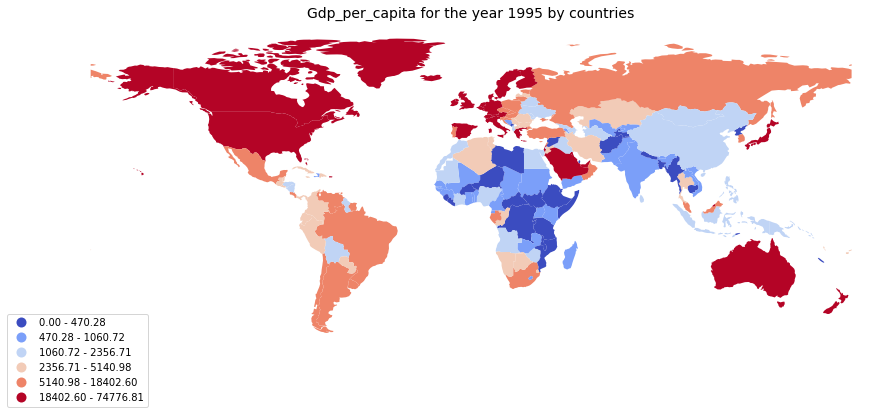

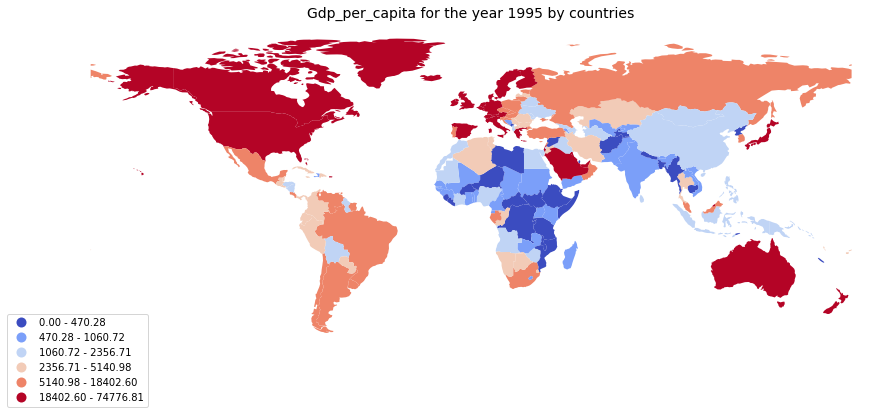

In [31]:
#Task 2.1
# For the year 1995
ax=plotting.dropna().plot(column='1995',cmap='coolwarm',figsize=(15,9),scheme='quantiles',k=6,legend=True);


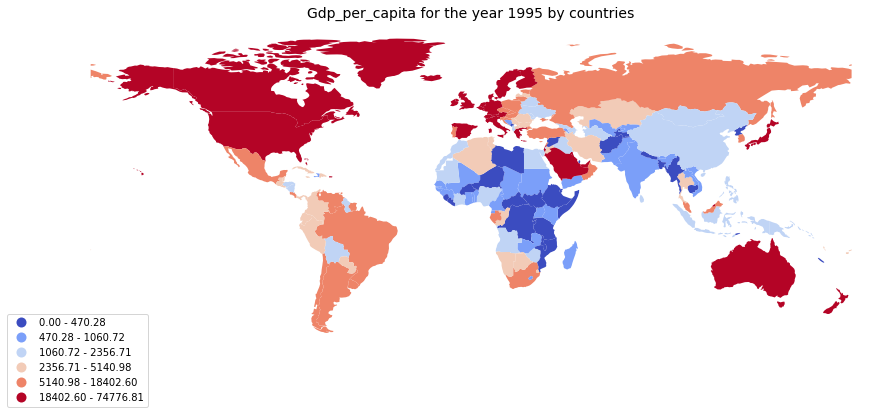

In [32]:
#customising the cholropleth graph
ax.set_title('Gdp_per_capita for the year 1995 by countries',fontdict={'fontsize':14})
#remove axes
ax.set_axis_off()
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((0.12,0.12))
ax.get_figure()
#from the maps represents countries with gdp per capita with different colors.
#The darker the color represents highest gdp per capita.

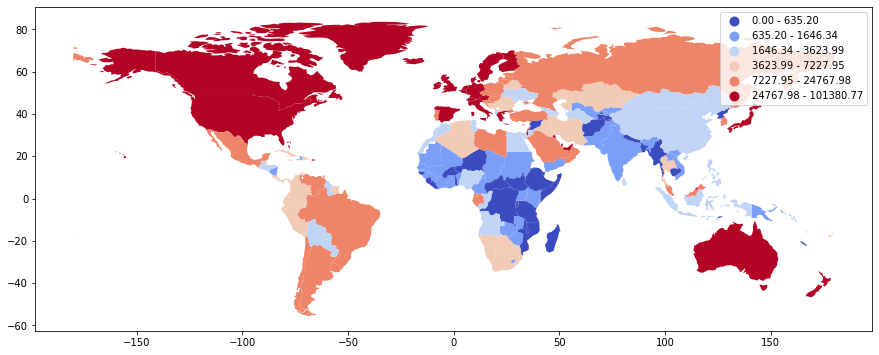

In [33]:
# For the year 2005
ax1=plotting.dropna().plot(column='2005',cmap='coolwarm',figsize=(15,9),scheme='quantiles',k=6,legend=True);

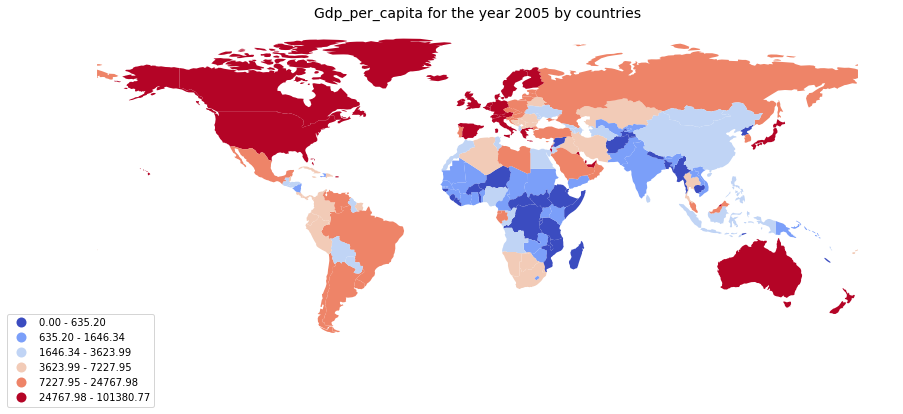

In [34]:
#customising the choropleth graph for the year 2005
ax1.set_title('Gdp_per_capita for the year 2005 by countries',fontdict={'fontsize':14})
#remove axes
ax1.set_axis_off()
#move legend to an empty space
ax1.get_legend().set_bbox_to_anchor((0.12,0.12))
ax1.get_figure()

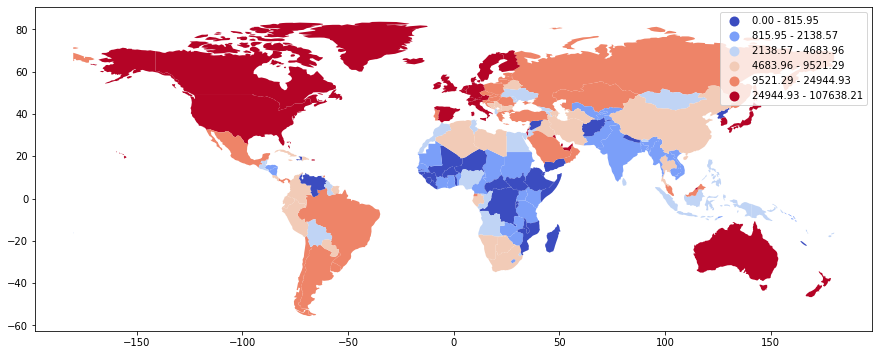

In [35]:
#For the year 2015
ax2=plotting.dropna().plot(column='2015',cmap='coolwarm',figsize=(15,9),scheme='quantiles',k=6,legend=True);

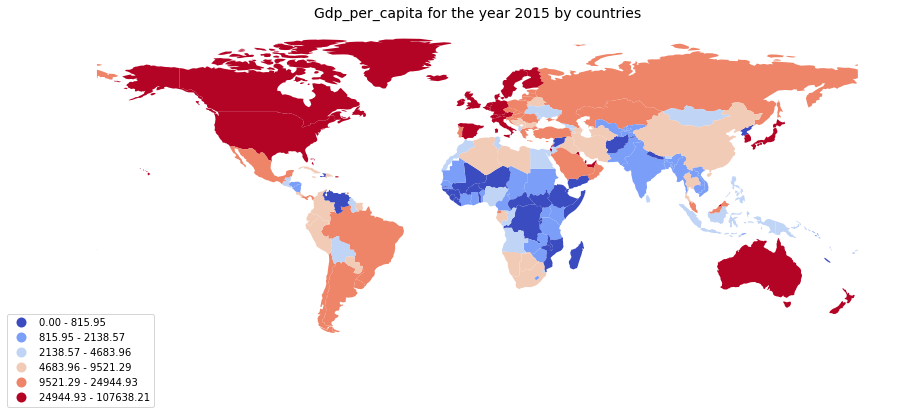

In [36]:
#customising the cholropleth graph
ax2.set_title('Gdp_per_capita for the year 2015 by countries',fontdict={'fontsize':14})
#remove axes
ax2.set_axis_off()
#move legend to an empty space
ax2.get_legend().set_bbox_to_anchor((0.12,0.12))
ax2.get_figure()

In [45]:
#Task 2.2
#Since Gdp per capita is calculated in millions 
plotting1=plotting[(plotting['2015'] > 300000000/1000000)]

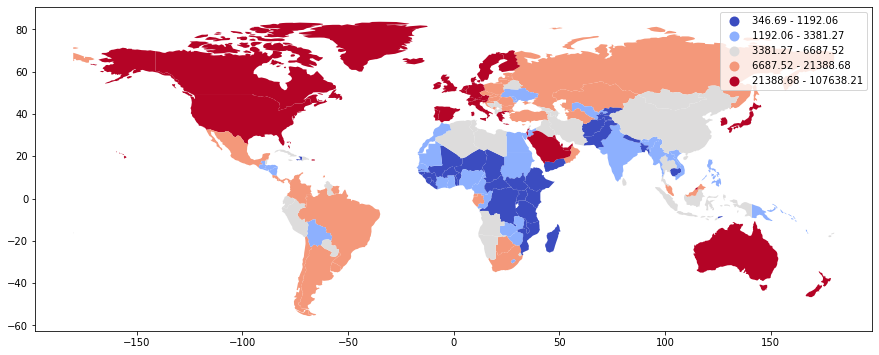

In [47]:
# Plotting gdp_per capita for countries with more than 300 millions gdp per capita
plotting1.plot(column='2015',cmap='coolwarm',figsize=(15,9),scheme='quantiles',legend=True);
#From the choropleth maps represents countries with the highest gdp per capita 
#For more than 300 million.
#The darker the color the highest gdp per capita in the country.
#For example the highest gdp per capita reppresents countries such as United states,Japan.

In [55]:
# # Plotting gdp_per capita for countries with more than 70 millions gdp per capita
plotting1=plotting[(plotting['2015'] < 70000000/1000000)]

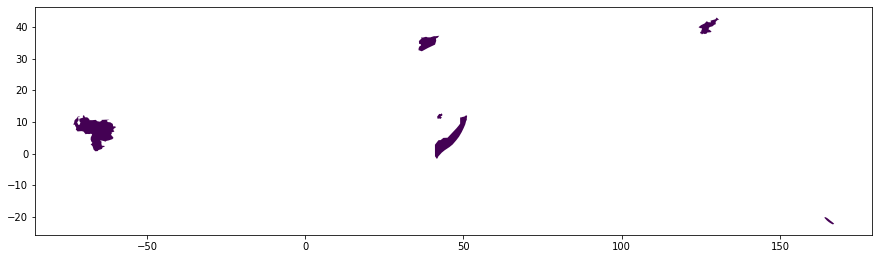

In [60]:
#From the maps we can see that few countries have gdp per capita of less than 70 million.
plotting1.plot(column='2015',figsize=(15,6));


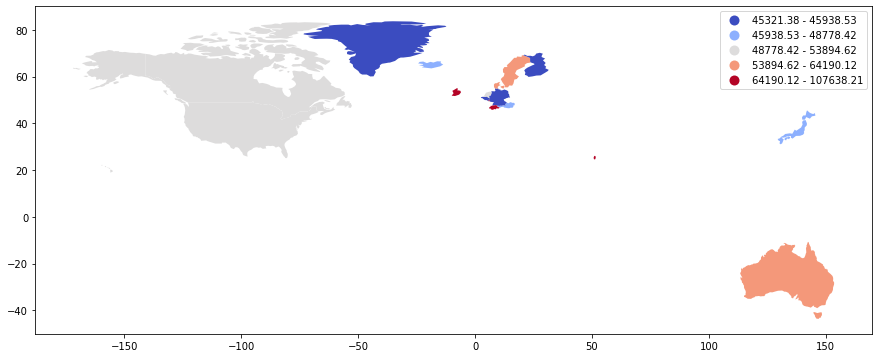

In [104]:
# Values that lie between 450 billion and 8920 billion 
plotting2=plotting[(plotting['2015'] > 450000000000/10000000 )]
plotting2.plot(column='2015',cmap='coolwarm',figsize=(15,9),scheme='quantiles',legend=True);

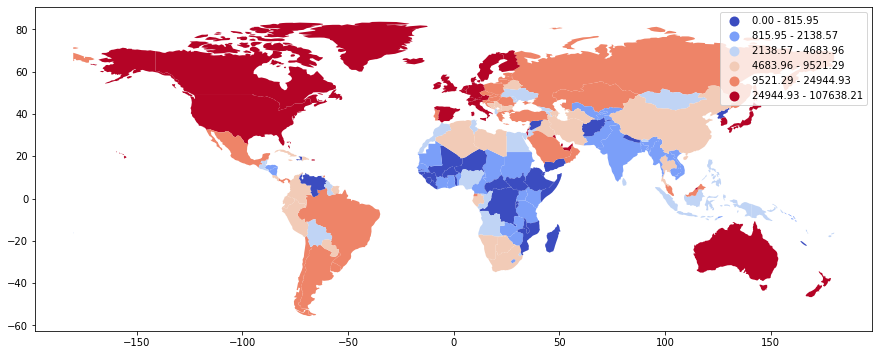

In [63]:
#From the two graphs we can deduce that the majority of countries have gdp per capita between 450 billion and 8920 billion dollars
#Thedarker the colors the highest gdp per capita
plotting2=plotting[(plotting['2015'] <= 8920000000000/1000000)]
plotting2.plot(column='2015',cmap='coolwarm',figsize=(15,9),scheme='quantiles',k=6,legend=True);

Text(0.5, 1.0, 'Mean per capita for the year 1995')

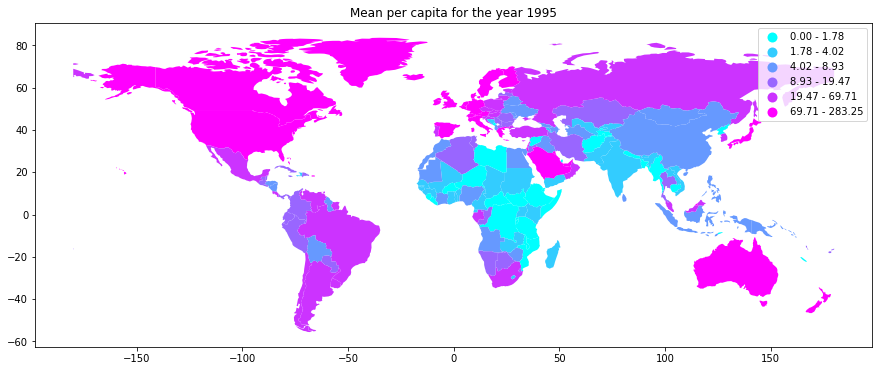

In [78]:
#plotting mean per capita for 1995
#From the maps we can see that the mean per capita is highest represent by the darker colors
#For example United states has the highest mean gdp per capita in the year 1995
ax4=plotting.dropna().plot(column='mean_for_1995',cmap='cool',figsize=(15,9),scheme='quantiles',k=6,legend=True);
ax4.set_title("Mean per capita for the year 1995")

Text(0.5, 1.0, 'Mean per capita for the year 2005')

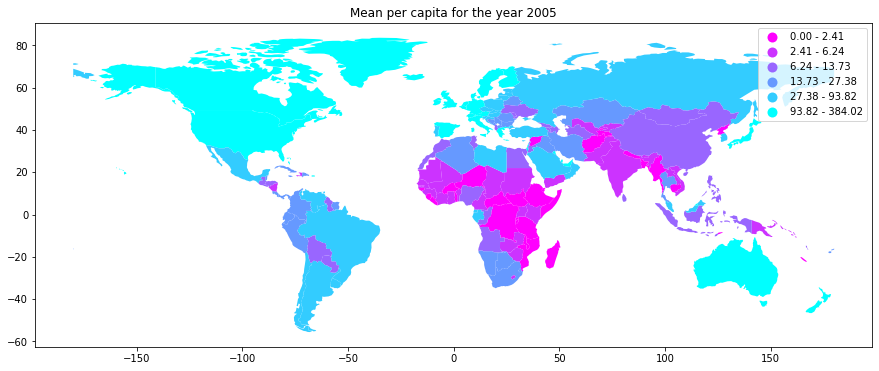

In [79]:
#plotting mean per capita for 2005
#For the year 2005 we can see countries like Australia have the highest mean gdp per capita
#The darker the color the highest mean gdp per capita
ax4=plotting.dropna().plot(column='mean_for_2005',cmap='cool_r',figsize=(15,9),scheme='quantiles',k=6,legend=True);
ax4.set_title("Mean per capita for the year 2005")

Text(0.5, 1.0, 'Mean per capita for the year 2015')

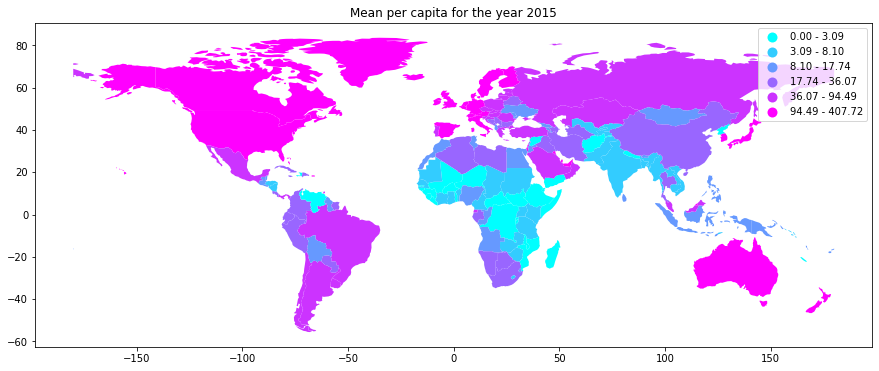

In [80]:
#plotting mean per capita for 2015
#For the year 2015 still countries with the highest mean gdp per capita represented by dark colors.
ax4=plotting.dropna().plot(column='mean_for_2015',cmap='cool',figsize=(15,9),scheme='quantiles',k=6,legend=True);
ax4.set_title("Mean per capita for the year 2015")

In [71]:
# mean population of each country from 1995 to 2015 and mean per gdp capita
mean = (world_df['1995']/len(world_df))
mean1 =(world_df['2005']/len(world_df))
mean2 =(world_df['2015']/len(world_df))
world_df['pop1995'] = (mean)
world_df

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Country_Name,Country_code,1995,2005,2015,pop1995
0,Aruba,ABW,80324.0,100031.0,104341.0,303.109434
1,Afghanistan,AFG,18110657.0,25654277.0,34413603.0,68342.101887
2,Angola,AGO,13945206.0,19433602.0,27884381.0,52623.418868
3,Albania,ALB,3187784.0,3011487.0,2880703.0,12029.373585
4,Andorra,AND,63850.0,78867.0,78011.0,240.943396
...,...,...,...,...,...,...
260,"Yemen, Rep.",YEM,14913315.0,20107409.0,26497889.0,56276.660377
261,South Africa,ZAF,41435758.0,47880601.0,55386367.0,156361.350943
262,Zambia,ZMB,9096607.0,11856247.0,15879361.0,34326.818868
263,Zimbabwe,ZWE,11410714.0,12076699.0,13814629.0,43059.298113


In [72]:
world_df['pop2005'] = (mean1)
world_df

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country_Name,Country_code,1995,2005,2015,pop1995,pop2005
0,Aruba,ABW,80324.0,100031.0,104341.0,303.109434,377.475472
1,Afghanistan,AFG,18110657.0,25654277.0,34413603.0,68342.101887,96808.592453
2,Angola,AGO,13945206.0,19433602.0,27884381.0,52623.418868,73334.347170
3,Albania,ALB,3187784.0,3011487.0,2880703.0,12029.373585,11364.101887
4,Andorra,AND,63850.0,78867.0,78011.0,240.943396,297.611321
...,...,...,...,...,...,...,...
260,"Yemen, Rep.",YEM,14913315.0,20107409.0,26497889.0,56276.660377,75877.015094
261,South Africa,ZAF,41435758.0,47880601.0,55386367.0,156361.350943,180681.513208
262,Zambia,ZMB,9096607.0,11856247.0,15879361.0,34326.818868,44740.554717
263,Zimbabwe,ZWE,11410714.0,12076699.0,13814629.0,43059.298113,45572.449057


In [73]:
world_df['pop2015'] = (mean3)
world_df

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country_Name,Country_code,1995,2005,2015,pop1995,pop2005,pop2015
0,Aruba,ABW,80324.0,100031.0,104341.0,303.109434,377.475472,393.739623
1,Afghanistan,AFG,18110657.0,25654277.0,34413603.0,68342.101887,96808.592453,129862.652830
2,Angola,AGO,13945206.0,19433602.0,27884381.0,52623.418868,73334.347170,105224.079245
3,Albania,ALB,3187784.0,3011487.0,2880703.0,12029.373585,11364.101887,10870.577358
4,Andorra,AND,63850.0,78867.0,78011.0,240.943396,297.611321,294.381132
...,...,...,...,...,...,...,...,...
260,"Yemen, Rep.",YEM,14913315.0,20107409.0,26497889.0,56276.660377,75877.015094,99992.033962
261,South Africa,ZAF,41435758.0,47880601.0,55386367.0,156361.350943,180681.513208,209005.158491
262,Zambia,ZMB,9096607.0,11856247.0,15879361.0,34326.818868,44740.554717,59922.116981
263,Zimbabwe,ZWE,11410714.0,12076699.0,13814629.0,43059.298113,45572.449057,52130.675472


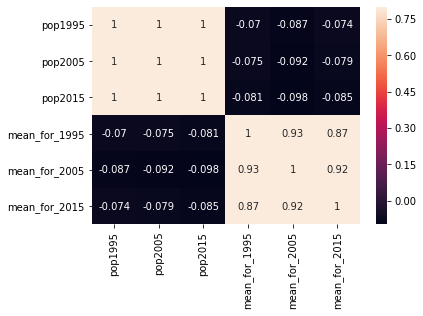

In [91]:
# Plotting correlation plots with heat maps
import seaborn as sns
corr1 = world_df[['pop1995','pop2005','pop2015']]
corr2 = Gdp_per_capita[['mean_for_1995','mean_for_2005','mean_for_2015']]
dat = pd.concat([corr1,corr2],axis=1).corr()
#using heatmap
sns.heatmap(dat,vmax=0.8,annot=True)

In [ ]:
#There is a high relationship between mean for the year 2015 and 1995 and also mean for the year 2005
#There is a negative relationship between population and the means of the years.